In [1]:
import pathlib
import os
import numpy as np
import cv2
#pathlib.Path().absolute()
os.chdir('C:/Users/micka/Documents/PythonProgram/Images')
img = cv2.imread('sudoku.jpeg')


ModuleNotFoundError: No module named 'cv2'

In [2]:
import numpy as np
import cv2

# Load an color image in grayscale
img = cv2.imread('sudoku.jpeg')


ModuleNotFoundError: No module named 'cv2'

In [3]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
from matplotlib import pyplot as plt
img = cv2.imread('sudoku.jpeg',0)
plt.imshow(img, cmap = "gray", interpolation = "bicubic")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
proc = cv2.GaussianBlur(img.copy(), (9, 9), 0)
proc = cv2.adaptiveThreshold(proc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

In [6]:
proc = cv2.bitwise_not(proc, proc) 
kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]],np.uint8)
proc = cv2.dilate(proc, kernel)

In [7]:
cv2.imshow('image',proc)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
contours, h = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
polygon = contours[0]

In [15]:
bottom_right, _ = max(enumerate([pt[0][0] + pt[0][1] for pt in
 polygon]), key=operator.itemgetter(1))
top_left, _ = min(enumerate([pt[0][0] + pt[0][1] for pt in
 polygon]), key=operator.itemgetter(1))
bottom_left, _ = min(enumerate([pt[0][0] - pt[0][1] for pt in
 polygon]), key=operator.itemgetter(1))
top_right, _ = max(enumerate([pt[0][0] - pt[0][1] for pt in
 polygon]), key=operator.itemgetter(1))

In [14]:
import operator

In [16]:
crop_rect = [polygon[top_left][0], polygon[top_right][0], polygon[bottom_right][0], polygon[bottom_left][0]]

In [19]:
top_left, top_right, bottom_right, bottom_left = crop_rect[0], crop_rect[1], crop_rect[2], crop_rect[3]
src = np.array([top_left, top_right, bottom_right, bottom_left], dtype='float32') 
side = max([ distance_between(bottom_right, top_right), 
 distance_between(top_left, bottom_left),
 distance_between(bottom_right, bottom_left), 
 distance_between(top_left, top_right) ])

In [18]:
def distance_between(p1, p2):
	"""Returns the scalar distance between two points"""
	a = p2[0] - p1[0]
	b = p2[1] - p1[1]
	return np.sqrt((a ** 2) + (b ** 2))

In [20]:
dst = np.array([[0, 0], [side - 1, 0], [side - 1, side - 1], [0, side - 1]], dtype='float32')
m = cv2.getPerspectiveTransform(src, dst)
crop = cv2.warpPerspective(img, m, (int(side), int(side)))

In [21]:
cv2.imshow('image',crop)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
side

511.0

In [23]:
import pathlib
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
#pathlib.Path().absolute()
os.chdir('C:/Users/micka/Documents/PythonProgram/Images')
img = cv2.imread('sudoku.jpeg')

In [24]:
test = cv2.copyMakeBorder(img,10,10,10,10, cv2.BORDER_REFLECT)
test2 = cv2.copyMakeBorder(img,10,10,10,10, cv2.BORDER_REFLECT_101)

<function matplotlib.pyplot.show(*args, **kw)>

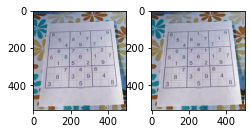

In [25]:
plt.subplot(231)
plt.imshow(test)
plt.subplot(232)
plt.imshow(test2,"gray")
plt.show

In [14]:
x = np.uint8([250])
y = np.uint8([10])

In [16]:
cv2.add(x,y)

array([[255]], dtype=uint8)

In [18]:
test.dtype

dtype('uint8')

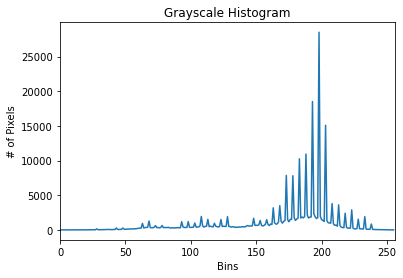

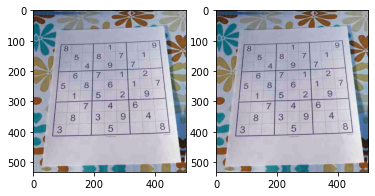

-1

In [26]:
import pathlib
import os
import numpy as np
import cv2


from matplotlib import pyplot as plt 
import matplotlib
#print(matplotlib.get_backend())


#pathlib.Path().absolute()
os.chdir('C:/Users/micka/Documents/PythonProgram/Images')
img = cv2.imread('sudoku.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Image", img)

cv2.imshow("Gray", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()


# construct a grayscale histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)


test = cv2.copyMakeBorder(img,10,10,10,10, cv2.BORDER_REFLECT)
test2 = cv2.copyMakeBorder(img,10,10,10,10, cv2.BORDER_REFLECT_101)
plt.figure()
plt.subplot(121)
plt.imshow(test)
plt.subplot(122)
plt.imshow(test2)
plt.show()
cv2.waitKey(0)


In [27]:
import pathlib
import os
import numpy as np
import cv2



from matplotlib import pyplot as plt 
import matplotlib
#print(matplotlib.get_backend())


#pathlib.Path().absolute()
os.chdir('C:/Users/micka/Documents/PythonProgram/Images')
img = cv2.imread('sudoku.jpeg')
test = img.copy()

img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#ret, mask = cv2.threshold(img2gray, 131, 255, cv2.THRESH_BINARY)
#cv2.imshow("Image", mask)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

proc=cv2.GaussianBlur(img.copy(),(9,9),0)
proc = cv2.adaptiveThreshold(proc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

proc = cv2.bitwise_not(proc, proc) 
kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]],np.uint8)
proc = cv2.dilate(proc, kernel)


# Detecting shapes in image by selecting region  
# with same colors or intensity. 
contours,_=cv2.findContours(proc, cv2.RETR_EXTERNAL, 
                            cv2.CHAIN_APPROX_SIMPLE) 
   
# Searching through every region selected to  
# find the required polygon. 
for cnt in contours : 
    area = cv2.contourArea(cnt) 
   
    # Shortlisting the regions based on there area. 
    if area > 100:  
        polygon = cnt 
   

cv2.imshow("Image", test)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [28]:
mask_inv = cv2.bitwise_not(mask)
cv2.imshow("Image", mask_inv)

cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'mask' is not defined

In [29]:
import operator
bottom_right, _ = max(enumerate([pt[0][0] + pt[0][1] for pt in polygon]), key=operator.itemgetter(1))
bottom_right

62

In [9]:
img2 = cv2.imread('messi.jpg')
cv2.imshow("Image2", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
rows,cols,chan = img.shape

In [11]:
roi=img2[0:rows, 0:cols]

In [19]:
img2_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
cv2.imshow("Image2", img2_bg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
img_fg = cv2.bitwise_and(img,img,mask = mask)
cv2.imshow("Image2", img_fg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
dst = img_fg + img2_bg
cv2.imshow("Image2", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
cv2.imshow("Image2", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
img_temp = img2

In [27]:
img_temp[0:rows, 0:cols] = dst

In [28]:
cv2.imshow("Image2", img_temp)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
cv2.useOptimized()

True